# Plotting Distributions with Seaborn

With Seaborn, it is also very practical to plot data distributions. We start with simple boxplots and bar graphs. Then, we show how to plot histograms and kde.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

## Load the dataframe

In [2]:
df = pd.read_csv("../data/BBBC007_analysis.csv")
df.head()

,area,intensity_mean,major_axis_length,minor_axis_length,aspect_ratio,file_name
0,139,96.546763,17.504104,10.292770,1.700621,20P1_POS0010_D_1UL
1,360,86.613889,35.746808,14.983124,2.385805,20P1_POS0010_D_1UL
2,43,91.488372,12.967884,4.351573,2.980045,20P1_POS0010_D_1UL
3,140,73.742857,18.940508,10.314404,1.836316,20P1_POS0010_D_1UL
4,144,89.375000,13.639308,13.458532,1.013432,20P1_POS0010_D_1UL


## Distribution Plots

The Seaborn function for distributions is [`sns.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot), whereby the histogram is the standard display type.

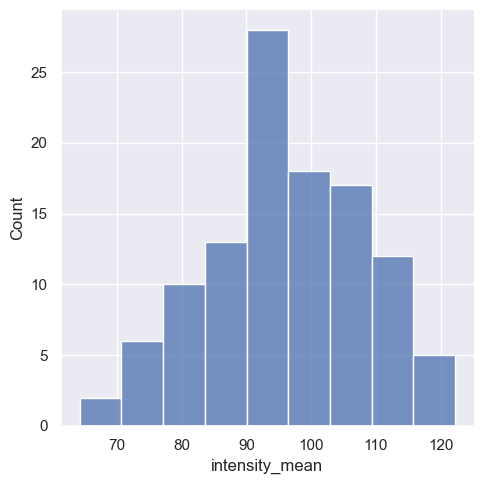

In [3]:
sns.displot(data=df,
            x="intensity_mean");

Again, we have the option to either display the distributions of the individual files in a single diagram with different colors or split them into two sub-diagrams. The choice depends on the argument to which we pass the `file_name` parameter: either `hue` for coloring within a single diagram or `col` for creating separate sub-diagrams.

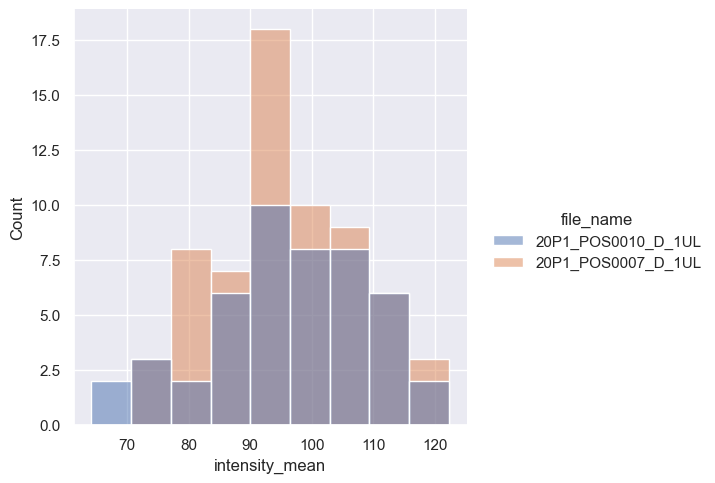

In [4]:
sns.displot(data=df,
            x="intensity_mean",
            hue="file_name");

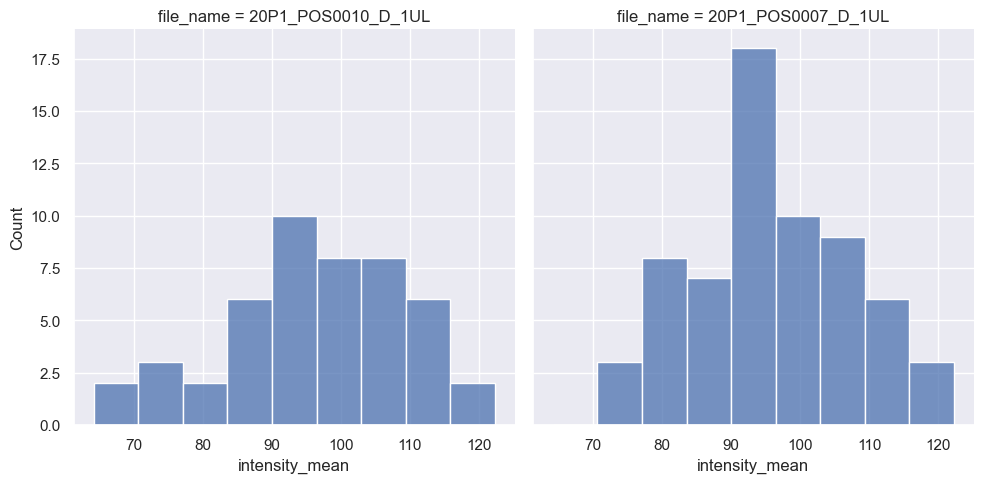

In [5]:
sns.displot(data = df,
            x="intensity_mean",
            col="file_name");

We can also add the kernel density estimation (kde) by passing `kde=True`. Just be careful while interpreting these plots (check some pitfalls [here](https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation-pitfalls)).

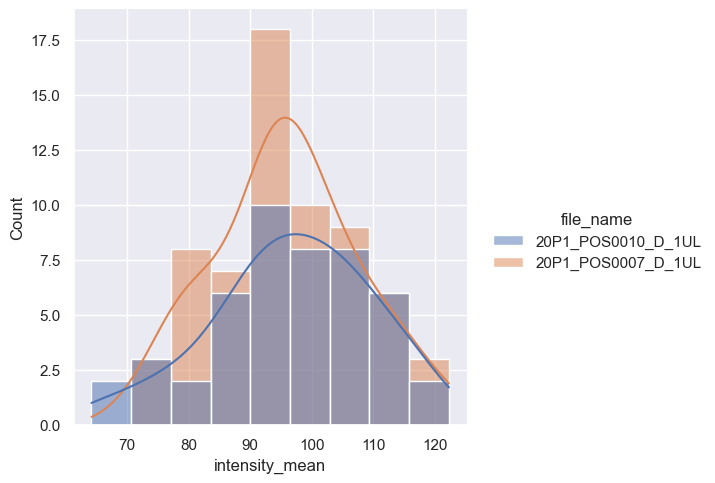

In [6]:
sns.displot(data=df,
            x="intensity_mean",
            hue="file_name",
            kde=True);

## Boxplots

Categorial variables are plotted with the function [`sns.catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot).

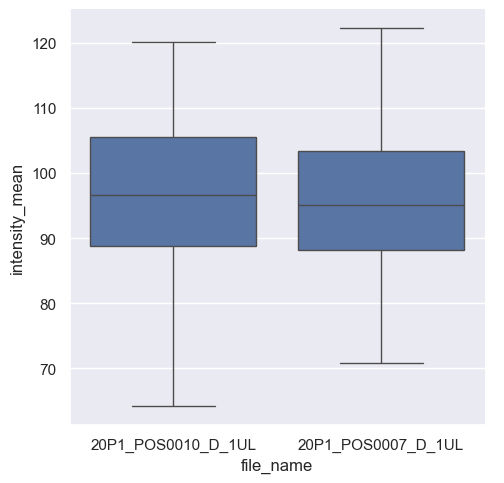

In [7]:
sns.catplot(data=df,
            x="file_name",
            y="intensity_mean",            
            kind="box");

Seaborn automatically identifies `file_name` as a categorical value and `ìntensity_mean` as a numerical value. Thus, it plots boxplots for the intensity variable. If we invert x and y, we still get the same graph, but as vertical boxplots.

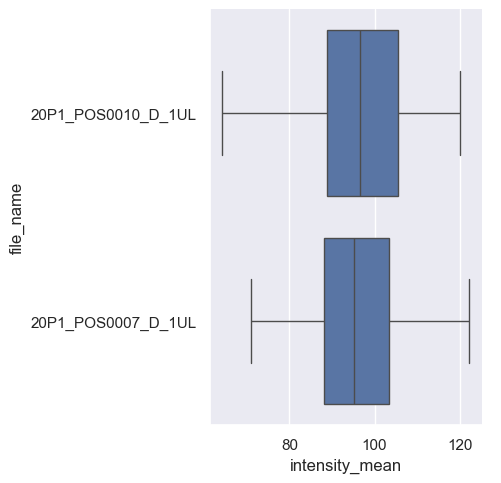

In [8]:
sns.catplot(data=df,
            x="intensity_mean",
            y="file_name",
            kind="box");

We can even create advanced visualizations, such as side-by-side boxplots, which are particularly useful for comparing pairs of categorical data.

First, we need to create a second categorical variable by splitting the observations into two categories depending on the size of their areas.

In [9]:
df['area_cat'] = np.where(df['area'] > 250, 'big', 'small')  # TODO Check what attendees have learned in previous session
df.head()

,area,intensity_mean,major_axis_length,minor_axis_length,aspect_ratio,file_name,area_cat
0,139,96.546763,17.504104,10.292770,1.700621,20P1_POS0010_D_1UL,small
1,360,86.613889,35.746808,14.983124,2.385805,20P1_POS0010_D_1UL,big
2,43,91.488372,12.967884,4.351573,2.980045,20P1_POS0010_D_1UL,small
3,140,73.742857,18.940508,10.314404,1.836316,20P1_POS0010_D_1UL,small
4,144,89.375000,13.639308,13.458532,1.013432,20P1_POS0010_D_1UL,small


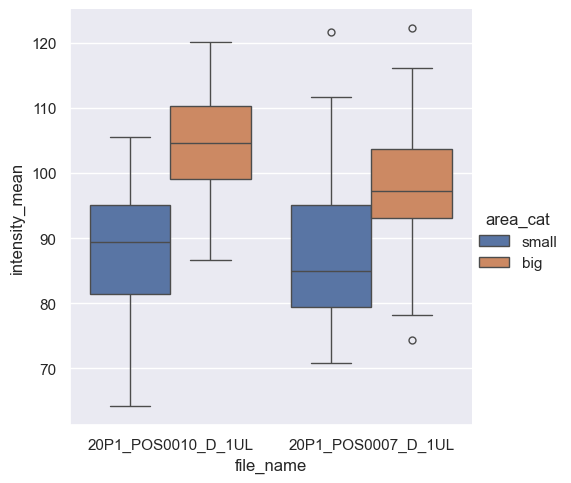

In [10]:
sns.catplot(data=df,
            x='file_name',
            y='intensity_mean',
            hue='area_cat',
            kind='box');

In a similar way, we get the count for categorical variables with the parameter `count`.

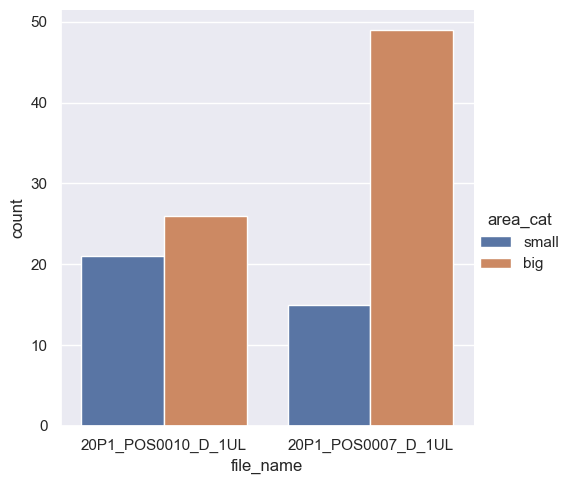

In [11]:
sns.catplot(data=df,
            x="file_name",
            hue='area_cat',
            kind="count");

## Exercise

Plot two empirical cumulative distribution functions for 'area' from different files on a same graph with different colors.

*Hint: look for the `kind` parameter of `displot`*

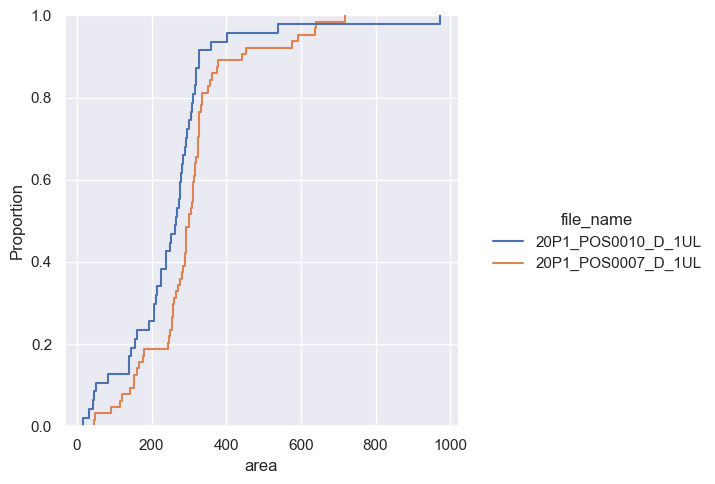

In [12]:
#'''
sns.displot(data=df,
            x="area",
            hue="file_name",
            kind="ecdf");
#'''